In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/Dummy Data HSS.csv')

In [13]:
df = df.fillna(df.mean(numeric_only=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [14]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TV,4572.0,54.07,26.10,10.0,32.00,53.00,77.00,100.00
Radio,4572.0,18.16,9.67,0.0,10.55,17.88,25.65,48.87
Social Media,4572.0,3.32,2.21,0.0,1.53,3.06,4.81,13.98
Sales,4572.0,192.47,93.07,31.2,112.40,189.63,272.41,364.08


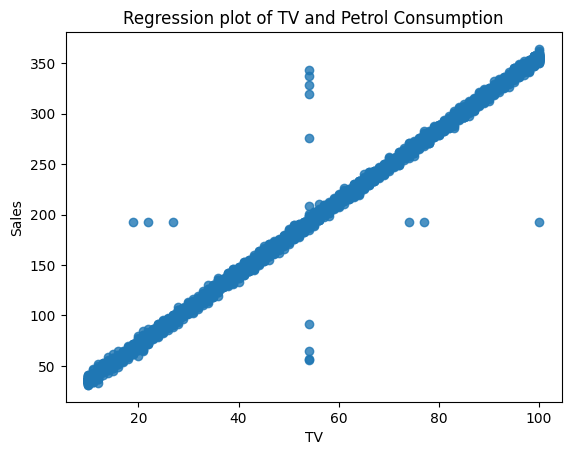

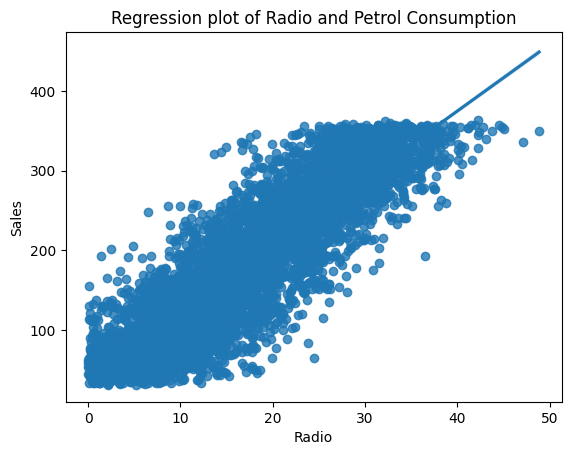

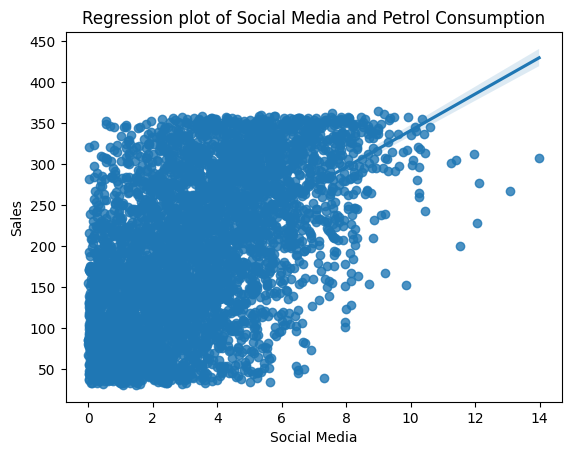

In [15]:
variables = ['TV', 'Radio', 'Social Media']
for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Sales', data=df).set(title=f'Regression plot of {var} and Petrol Consumption')

In [16]:
y = df['Sales']
X = df[['TV', 'Radio', 'Social Media']]

In [17]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [18]:
ax_regressor = LinearRegression()
ax_regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
ax_regressor.intercept_

0.05524906631242743

In [20]:
ax_regressor.coef_

array([3.5112574 , 0.13177259, 0.06802915])

In [21]:
feature_names = X.columns
feature_names

Index(['TV', 'Radio', 'Social Media'], dtype='object')

In [22]:
feature_names = X.columns
model_coefficients = ax_regressor.coef_

In [23]:
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

In [24]:
coefficients_df

,Coefficient value
TV,3.511257
Radio,0.131773
Social Media,0.068029


In [26]:
y_pred = ax_regressor.predict(X_test)

In [28]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(15)

,Actual,Predicted
538,90.054222,91.594914
1822,222.741668,219.741851
534,102.774790,103.253368
2119,328.239378,327.059885
561,351.807328,353.047304
2281,261.966812,263.628075
23,349.861575,353.048566
100,140.415286,138.920199
1912,264.592233,263.936968
3953,55.674214,53.230515


In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2.83
Mean squared error: 63.02
Root mean squared error: 7.94
